<a href="https://colab.research.google.com/github/chacha86/BigData3/blob/colab/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%95%EA%B7%9C%ED%99%94(normalization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

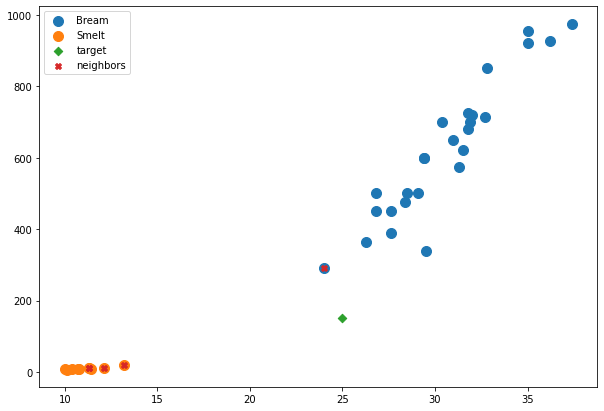

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Fish.csv')
df['target'] = 0
df.loc[df['Species'] == 'Bream', 'target'] = 1

df2  = df[(df['Species'] == 'Bream') | (df['Species'] == 'Smelt')]

target = df2['target'].values
data = df2[['Length1', 'Weight']].values

from sklearn.model_selection import train_test_split
trd, tsd, trt, tst = train_test_split(data, target, random_state=40)

pre = np.array([[25, 150]]) # 예측 대상

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(trd, trt)
knc.predict(pre) # 0 (Smelt)라고 예측
plt.figure(figsize=(10, 7)) # 그래프의 크기 확대
plt.scatter(trd[trt==1, 0], trd[trt==1, 1], [100], label='Bream') # 도미 산점도, 점의 크기를 100으로 세팅
plt.scatter(trd[trt==0, 0], trd[trt==0, 1], [100], label='Smelt') # 빙어 산점도, 점의 크기를 100으로 세팅
plt.scatter(pre[0, 0], pre[0, 1], label='target', marker='D') # 예측 대상(D 마커로 표현)

dist, idx = knc.kneighbors(pre) # 예측 대상과 가까운 이웃 5개의 거리와 인덱스를 얻어옴

plt.scatter(trd[idx, 0], trd[idx, 1], label='neighbors', marker='X') # 이웃의 인덱스를 이용한 이웃 산점도
plt.legend() # 범례

# 그래프상의 결과를 보면 target과 Bream이 더 가까움에도 불구하고 Smelt쪽에 neighbor가 찍힘
# 이유는 x축과 y축의 값의 범위가 차이가 많이 나서 x축에 변화에 대한 y축의 변화를 동일한 비율로 처리할 수 없음


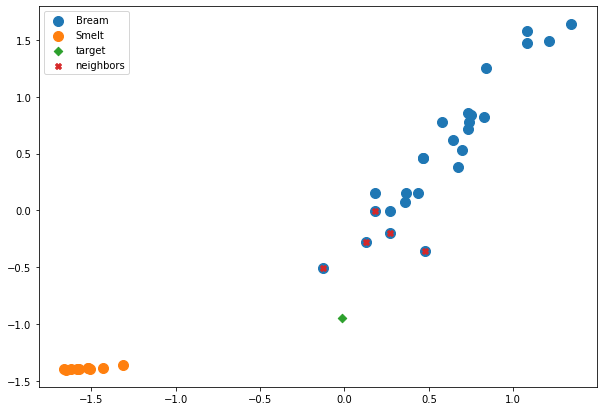

In [64]:
# 이같은 문제를 해결하기 위해 데이터를 정규화(normalization)한다.
# 표준점수를 이용한 표준화를 진행하기 위해 StandardScaler를 사용할 수 있다.

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(trd) # 표본 데이터를 넘긴다. 각 열의 모든 행을 표준점수((원본값 - 평균) / 표준편차)로 치환 

trd_s = ss.transform(trd) # trd 표준화
tsd_s = ss.transform(tsd) # tsd 표준화

pre = [[25, 150]]
pre_s = ss.transform(pre)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(trd_s, trt)
knc.predict(pre_s) # 1 (Bream)이라고 예측

plt.figure(figsize=(10, 7)) # 그래프의 크기 확대
plt.scatter(trd_s[trt==1, 0], trd_s[trt==1, 1], [100], label='Bream') # 도미 산점도, 점의 크기를 100으로 세팅
plt.scatter(trd_s[trt==0, 0], trd_s[trt==0, 1], [100], label='Smelt') # 빙어 산점도, 점의 크기를 100으로 세팅
plt.scatter(pre_s[0, 0], pre_s[0, 1], label='target', marker='D') # 예측 대상(D 마커로 표현)

dist, idx = knc.kneighbors(pre_s) # 예측 대상과 가까운 이웃 5개의 거리와 인덱스를 얻어옴

plt.scatter(trd_s[idx, 0], trd_s[idx, 1], label='neighbors', marker='X') # 이웃의 인덱스를 이용한 이웃 산점도
plt.legend() # 범례